In [25]:
from google.colab import files
uploaded = files.upload()

Saving sales_data_sample.csv to sales_data_sample (5).csv


In [26]:
import pandas as pd
import sqlite3

# Load CSV into DataFrame
df = pd.read_csv("sales_data_sample.csv", encoding='latin-1')

# Show first few rows to understand structure
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [27]:
# Connect to SQLite DB (it will create one in memory)
conn = sqlite3.connect("sales_data.db")

# Save DataFrame to SQLite table called 'sales'
df.to_sql("sales", conn, if_exists="replace", index=False)

2823

In [28]:
# SQL query to get total quantity and total revenue per product
query = """
SELECT
    PRODUCTCODE AS product,
    SUM(QUANTITYORDERED) AS total_qty,
    SUM(QUANTITYORDERED * PRICEEACH) AS revenue
FROM sales
GROUP BY PRODUCTCODE
"""

summary_df = pd.read_sql_query(query, conn)
print(summary_df)

       product  total_qty   revenue
0     S10_1678        944  88640.63
1     S10_1949        961  96100.00
2     S10_2016        928  87120.73
3     S10_4698        921  90912.30
4     S10_4757        952  89439.82
..         ...        ...       ...
104  S700_3505        917  85031.28
105  S700_3962        852  77644.63
106  S700_4002       1029  75398.28
107   S72_1253        920  51661.82
108   S72_3212        927  58623.62

[109 rows x 3 columns]


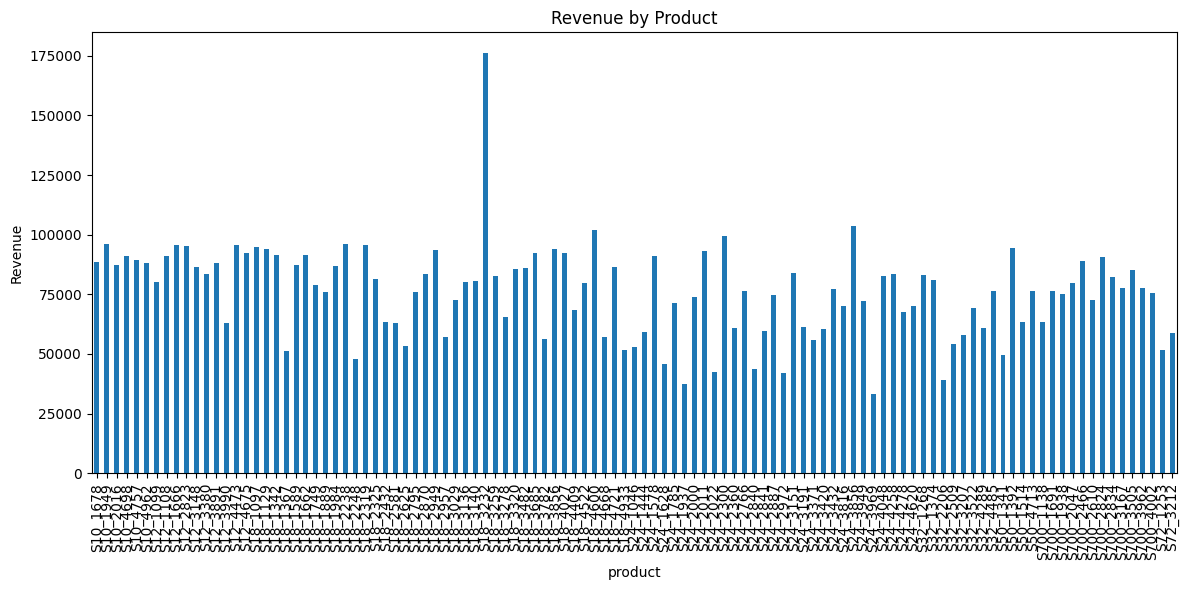

In [29]:
import matplotlib.pyplot as plt

# Plot revenue by product
summary_df.plot(kind='bar', x='product', y='revenue', figsize=(12,6), legend=False)
plt.title("Revenue by Product")
plt.ylabel("Revenue")
plt.tight_layout()
plt.savefig("sales_chart.png")  # Save the chart
plt.show()